# Unsupervised Machine Learning with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


# Objectives

* Learn what is unsupervised machine learning

* Group data with clustering

* Find underlying linear patterns with PCA

## Machine Learning with Python: `scikit-learn`

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

## Clustering

A series of techniques for finding clusters within datasets.

Clusters are groups of points that are closer to each other than to the rest.

<img src="figs/clustering.png" alt="Clustering" style="height: 600px; float: left;"/>


# Generate random data

We're going to generate random data normally distributed around three centers, with noise. Each cluster will have 200 points. We concatenate all three groups in a single dataframe. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(7)
centroids = np.random.randn(3,2)

In [6]:
centroids

array([[ 1.6905257 , -0.46593737],
       [ 0.03282016,  0.40751628],
       [-0.78892303,  0.00206557]])

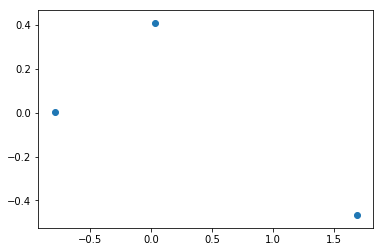

In [4]:
plt.scatter(centroids[:,0],centroids[:,1])

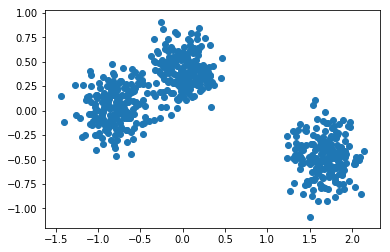

In [7]:
#Ahora generamos puntos al azar alrededor de estos
np.random.randn()
npoints = 200

scale= .2
first_cluster=scale*np.random.randn(npoints,2)+centroids[0]
second_cluster=scale*np.random.randn(npoints,2)+centroids[1]
third_cluster=scale*np.random.randn(npoints,2)+centroids[2]

all_points = np.concatenate([first_cluster, second_cluster, third_cluster])
plt.scatter(all_points[:,0],all_points[:,1])

#hay que buscar algo para sacar el clustering aunque no estémn muy diferenciados los puntos en el espacio.
#Se puede aumentando la dimensionalidad pero a partir de 10 dimensiones se rompen. Maldición de la dimensionalidad
# siempre reducir dimensionalidad antes de aplicar clustering
#para mejorar este ejemplo cogemos y manipulamos con el scale para que los clusters salgan juntos.

In [8]:
#hay que sacar los clusters minimizando la suma de distancias. Veamos el K - means

Please, note that the data we have created does not have a class. It is just a set of points. However, we DO know that they come from different distribution and our objective is to find out them.

## K-means clustering

Very simple algorithm, quite fast:

- Throw K candidate cluster centers (_centroids_) randomly at the data.

- Assign points to the closest centroid.

- Update the centroid as the average of its observations.

- Repeat 2,3 until convergence.



```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    # or select K random points from data
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

In [8]:
#lo que hace este algoritmo es crear K centroides aleatorios , y los puntos más cerca a determinado centroide pues
#forman un grupo, y ahora se quitan los centroides aleatorios y se ponen en el centro de los puntos que han formado
#grupo con el. Y hacemos otra iteración , y así hasta que se minimice la distancia.
#k means lo malo es que tiendde a esperar clusters de una forma gaussiana. Podemos usar otros métodos 
#en otros casos

In [9]:
#vamos a picarnos un clustering

### Exercise

In [9]:
np.random.seed(1213)

starting = np.random.randn(3,2)
starting

array([[ 0.51160368, -0.21766022],
       [-0.52106002,  1.25327036],
       [ 1.10455414, -0.77030869]])

In [10]:
#importamos librería para calcular distamcias entre dos puntos
from scipy.spatial.distance import cdist

help(cdist)

Help on function cdist in module scipy.spatial.distance:

cdist(XA, XB, metric='euclidean', *args, **kwargs)
    Compute distance between each pair of the two collections of inputs.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    XA : ndarray
        An :math:`m_A` by :math:`n` array of :math:`m_A`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    XB : ndarray
        An :math:`m_B` by :math:`n` array of :math:`m_B`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    metric : str or callable, optional
        The distance metric to use.  If a string, the distance function can be
        'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao',
        'seuclidean

In [12]:
distances = cdist(all_points,starting,'euclidean')
#1800 distacias de cada punto a 3 centroides

In [15]:
distances.shape

(600, 3)

In [16]:
#ahora calcular el minimo de cada fila
clusters = np.argmin(distances,axis=1)
#esto se interpreta como que en la primera fila el minimo está en la posición 2 , y así.

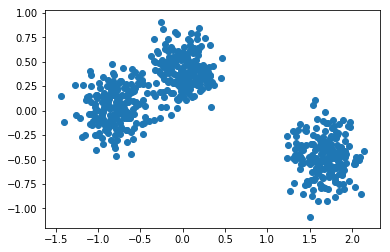

In [19]:
plt.scatter(all_points[:,0],all_points[:,1])

In [15]:
#vamos a hacer una funcion que itere lo que hemos hecho para que se generen clusters.Faltaría posteriormente 
#generar nuevos centroides.

In [20]:
mean_points_1st_cluster = np.mean(all_points[clusters == 0],axis=0)
mean_points_2nd_cluster = np.mean(all_points[clusters == 1],axis=0)
mean_points_3rd_cluster = np.mean(all_points[clusters == 2],axis=0)
#escojo todos los puntos pertencecientes al ptrimer cluster (primera columna el mínimo) y hago la media
#lo mismo para clusters 2 y 3.
# y ahora me hago los new_centroids:
new_centroids = np.concatenate([np.mean(all_points[clusters == 0],axis=0),np.mean(all_points[clusters == 1],axis=0)
                               ,np.mean(all_points[clusters == 2],axis=0)]).reshape(3,2)
new_centroids

array([[-0.21103487,  0.16202585],
       [-0.60395997,  0.28348034],
       [ 1.67741674, -0.47413915]])

array([[-0.21103487,  0.16202585],
       [-0.60395997,  0.28348034],
       [ 1.67741674, -0.47413915]])

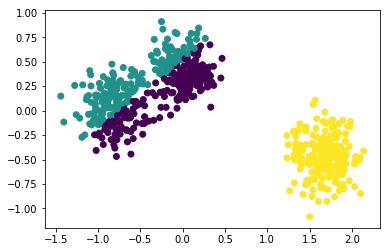

In [24]:
#aquí hay mucho que explicar, cdist lo que hace es sacara para cada punto una distancia para cada centroide
#, es decir 3 distancias por punto, que sale en forma de matriz 600x3. np.argmin lo que hace es calcualrte la columna
#donde está la menor distamcia , columna por el axis = 1 , si fuese axis= 0 saldría fila pero no tendría sentido.
#new_centroids es la media de cluster1, la del 2 y la del 3 ,
#que se ponen como mascara clusters para sacar los puntos que nos interesan cada vez y sacas así los new_centroids.
def iterate (all_points, centroids):
    distances = cdist(all_points,centroids)
    clusters = np.argmin(distances,axis=1)
    new_centroids = np.concatenate([np.mean(all_points[clusters == 0],axis=0),np.mean(all_points[clusters == 1],axis=0)
                               ,np.mean(all_points[clusters == 2],axis=0)]).reshape(3,2)
    plt.scatter(all_points[:,0],all_points[:,1],c=clusters)
    
    return new_centroids,clusters

new_centroids, clusters = iterate(all_points,starting)
new_centroids

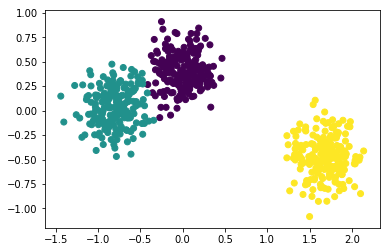

In [26]:
old_centroids, old_clusters = new_centroids,clusters
new_centroids,clusters = iterate(all_points,old_centroids)
#y vas viendo durante las iteraciones como va quedando mejor el clustering.


In [41]:
#ahora vamos a jugar con sklearn con el número de grupos y tal y cual.
from sklearn.cluster import KMeans

#defino la instancia
clusterer = KMeans(3)

clusters=clusterer.fit_predict(all_points)
#clusters (hace lo mismo que hemos hecho básicamente en la función anterior ). Hay que saberlo.
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

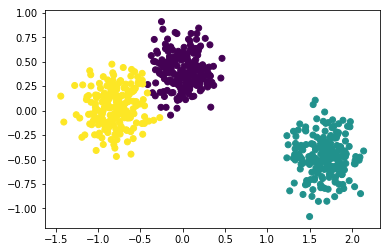

In [42]:
plt.scatter(all_points[:,0],all_points[:,1],c=clusters)
#el problema es que modificando el número de clusters puede que tenga ckusters que no tengan sentido,
#de hecho si ponemos 6 por ejemplo, se ve que las fronteras no tienen ningún sentido.

Now we are going to compare the original 'cluster' where each point comes from, with the asigned cluster. In order to do that, we just create a vector with the original class (color) and use that to plot. 

Please, recall that this is something we can do here because we're creating a synthetic dataset, but normally we won't be able to do it, since we don't know how the data has been generated.

Notice that class labels (kmeans) may not agree with original class number.

Now let's take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

### Practical: K-Means Clustering with sklearn

Download `players_20.csv` from [here](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv).

In [43]:
df = pd.read_csv('/home/dsc/Machine Learning (Unsupervised Learning) and Feature Engineering/players_20.csv')

In [44]:
pd.options.display.max_columns = None

In [45]:
#me cojo a los buenos
df = df[df['overall'] > 75]

In [46]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

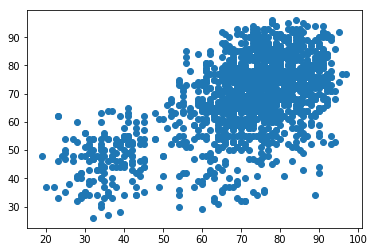

In [47]:
plt.scatter(df['power_stamina'],df['movement_sprint_speed'])

In [48]:
#vamos a clasificarlos con sklearn con el k means
clusters = KMeans(n_clusters = 2).fit_predict(df[['power_stamina','movement_sprint_speed']])
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

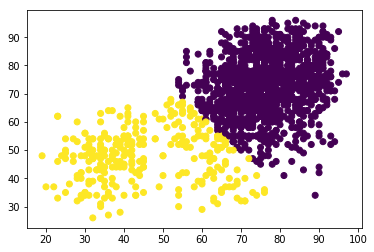

In [50]:
plt.scatter(df['power_stamina'],df['movement_sprint_speed'],c=clusters)
#k means tiende a crear grupos de una superficie parecida, entonces deberíamos probar con otros algoritmos

## The elbow method

To choose a number of clusters in KMeans

In [51]:
distances = cdist(clusterer.cluster_centers_,all_points)
minimos_por_fila=np.min(distances,axis=1)
#600 minimos
minimos_por_fila.mean()

0.012710002959338482

In [53]:
minimos_por_fila

array([0.01378087, 0.01756137, 0.00678777])

CPU times: user 943 ms, sys: 19.5 ms, total: 962 ms
Wall time: 984 ms


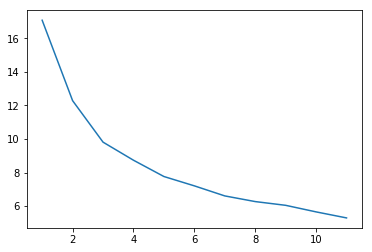

In [54]:
%%time

#para ver cuantos clusters es optimo poner
#Vamos a tomar una medida de calidad del clsutering
clusterings = []
scores = []

for n_clusters in range(1,12):
    this_one = KMeans(n_clusters=n_clusters)
    clusters = this_one.fit_predict(df[['power_stamina','movement_sprint_speed']])
    
    distances = cdist(df[['power_stamina','movement_sprint_speed']],this_one.cluster_centers_)
    #la barrabaja al final de clusters_centers_ significa que e una varisable generada por sklearn
    score = np.min(distances,axis=1).mean()
    
    clusterings.append(this_one)
    scores.append(score)
    
plt.plot(range(1,12),scores)
#obviametne mejora mucho cuando introducimos dos clusters, pero no mejora tanto al introducir un 3 cluster

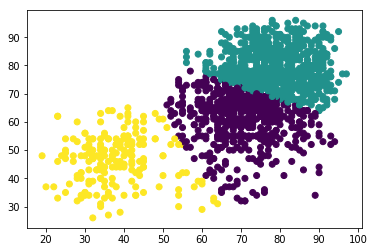

In [58]:
plt.scatter(df['power_stamina'],df['movement_sprint_speed'],c=clusterings[2].labels_)
#se puede jugar con los grupos y como lo representa python

## Hierarchical clustering

Instead of subdividing the observations, we join those that are similar to each other.

We can track the order in which we join them up and represent it as a _dendrogram_.

We don't need to specify the number of clusters beforehand.

In [31]:
k#lo mejor de esto es que no tienes por que decir un número de clusters

<img src="https://i0.wp.com/datascienceplus.com/wp-content/uploads/2016/01/hclust.png" alt="Dendrogram" style="height: 600px; float: left;"/>


### Distance measures in clustering

In any of these approaches, we need a measure of distance or similarity between points. 

In hierarchical clustering, we additionally need a measure of similarity between single points and groups of points.

How will this measures be influenced by the scale of our variables?

### Clustering in scikit-learn

![Clustering algorithms in scikit-learn](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

## DBSCAN

There's also a hierarchical version.



(array([-1,  0,  1,  2]), array([  28, 1417,  162,    8]))

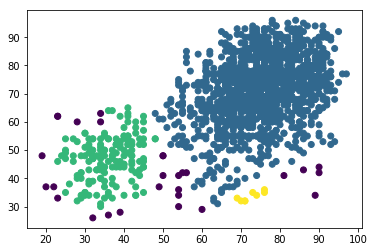

In [63]:
#vamos a aprender DBSCAN , no necesita especificar
#numero de clusters y además te identifica un cluster extxra de outliers, con lo cual vamos a aprenderlo
from sklearn.cluster import DBSCAN

two_columns = df[['power_stamina','movement_sprint_speed']]

dbscan = DBSCAN(eps = 4.1)
#Le metemos la variable epsilon (distancia que está dispuesto a saltar para que 
#dos puntos sigan siendo del mismo cluster), porque se va expandiendo.
labels=dbscan.fit_predict(two_columns)

plt.scatter(two_columns['power_stamina'],two_columns['movement_sprint_speed'],c=labels)

np.unique(labels,return_counts=True)
#-1 son los puntos no conectados que te sale, 1483 outliers,
#es decir lamentable, y encima 22 clusters, el epsilon es muy pequeño

In [33]:
#esos dos grupos diferenciados de jugadores 
#de FIFA se puede referir a que ese grupo con menos resistencia y velocidad son porteros.
#muy importante estandarizar magnitudes puesto que las distancias pueden ser peligrosas,
#en los árboles no pasa nada

In [64]:
#ahora vamos a ver que portero o que jugador no se parece a los demás dentro de su cluster
df[labels == -1]
#y aquí tenemos los outliers

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
21,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,1988-07-16,189,76,Spain,FC Barcelona,89,89,55000000,300000,"CDM, CM",Right,4,3,3,Medium/Medium,Lean,Yes,112800000.0,"#Playmaker , #Tactician",CDM,5.0,NaN,2008-09-01,2023.0,CDM,5.0,42.0,62.0,80.0,80.0,85.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Giant Throw-in,62,67,68,89,44,80,66,68,82,88,40,43,67,87,49,61,66,86,77,54,85,89,77,86,60,93,90,86,80,5,8,13,9,13,70+3,70+3,70+3,73+3,75+3,75+3,75+3,73+3,78+3,78+3,78+3,75+3,83+3,83+3,83+3,75+3,78+3,86+3,86+3,86+3,78+3,78+3,82+3,82+3,82+3,78+3
125,236583,https://sofifa.com/player/236583/jiri-pavlenka...,J. Pavlenka,Jiří Pavlenka,27,1992-04-14,196,81,Czech Republic,SV Werder Bremen,84,86,26000000,37000,GK,Right,1,3,1,Medium/Medium,Lean,Yes,46200000.0,NaN,GK,1.0,NaN,2017-07-01,2021.0,SUB,23.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,79.0,70.0,88.0,36.0,80.0,Flair Passes,11,16,14,28,19,12,10,14,17,19,35,37,39,82,27,53,36,20,68,17,22,13,14,25,18,39,12,10,14,86,79,70,80,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,163587,https://sofifa.com/player/163587/kasper-schmei...,K. Schmeichel,Kasper Schmeichel,32,1986-11-05,189,89,Denmark,Leicester City,83,83,15500000,82000,GK,Right,2,3,1,Medium/Medium,Stocky,Yes,29500000.0,NaN,GK,1.0,NaN,2011-06-01,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,77.0,79.0,88.0,58.0,79.0,Avoids Using Weaker Foot,18,12,16,44,15,12,13,15,46,40,56,60,62,81,47,59,60,34,64,14,35,20,13,59,26,67,14,14,13,82,77,79,79,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,24630,https://sofifa.com/player/24630/jose-manuel-re...,Pepe Reina,José Manuel Reina Páez,36,1982-08-31,188,92,Spain,Milan,82,82,3700000,26000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,6400000.0,NaN,SUB,25.0,NaN,2018-07-02,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,82.0,82.0,81.0,57.0,82.0,"Flair, Swerve Pass",11,14,13,19,11,10,11,11,22,23,50,63,50,82,60,62,73,34,72,15,32,22,13,65,24,64,20,22,24,79,82,82,82,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,216194,https://sofifa.com/player/216194/daniel-garcia...,Dani García,Daniel García Carrillo,29,1990-05-24,180,80,Spain,Athletic Club de Bilbao,81,81,17000000,33000,"CM, CDM",Right,2,3,3,Medium/High,Stocky,Yes,35700000.0,NaN,RCM,14.0,NaN,2018-07-02,2022.0,NaN,NaN,42.0,69.0,73.0,75.0,78.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,Diver,55,69,46,82,52,73,61,57,79,80,52,34,67,79,70,72,64,89,73,73,85,81,78,79,58,74,80,84,77,6,14,14,6,11,68+2,68+2,68+2,70+2,72+2,72+2,72+2,70+2,74+2,74+2,74+2,71+2,79+2,79+2,79+2,71+2,73+2,81+2,81+2,81+2,73+2,72+2,75+2,75+2,75+2,72+2
530,187936,https://s

## Measuring quality of clustering

### Elbow method

We've already seen it

### Silhouette

In [35]:
#la silhouette mide la distancia entre los miembros de un clsuter y 
#la distancai media a los puntos de otro cluster
#muy importante mirar silhouette también en la ayuda de sklearn.
from sklearn.metrics import silhouette_score,silhouette_samples

for clustering in clusterings[1:]:
    score = silhouette_score(two_columns,clustering.labels_)
    n = clustering.n_clusters
    print('La puntuación del clsutering con %d clusters es el %f' % (n,score))


La puntuación del clsutering con 2 clusters es el 0.571017
La puntuación del clsutering con 3 clusters es el 0.397415
La puntuación del clsutering con 4 clusters es el 0.354317
La puntuación del clsutering con 5 clusters es el 0.362118
La puntuación del clsutering con 6 clusters es el 0.348587
La puntuación del clsutering con 7 clusters es el 0.364435
La puntuación del clsutering con 8 clusters es el 0.358057
La puntuación del clsutering con 9 clusters es el 0.324282
La puntuación del clsutering con 10 clusters es el 0.329317
La puntuación del clsutering con 11 clusters es el 0.350731


## Dimensionality reduction

### Principal Component Analysis (PCA)

A dimensionality reduction technique

![PCA as base change](https://intoli.com/blog/pca-and-svd/img/basic-pca.png)

* Now let's apply PCA to our dataset.


In [36]:
#vamos a coger a los jugadors del FIFA.
df.columns[df.dtypes == np.int64]

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'g

In [37]:
#antes de hacer un PCA evdientemente hay que estandarizar,
#no es lo mismo los años, que varía de 18 a 45, que valor en euros, que varía de 30.000 a 250.000

In [38]:
from sklearn.decomposition import PCA
pca = PCA()

only_ints = df[df.columns[df.dtypes == np.int64]]
new = pca.fit_transform(only_ints)

new.shape,only_ints.shape

((1615, 45), (1615, 45))

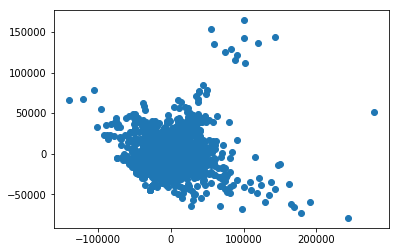

In [39]:
plt.scatter(new[:,1],new[:,2])

In [40]:
range(34)

range(0, 34)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(only_ints)
factorized = pca.fit_transform(standardized)

factorized


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-7.2932774 ,  6.3806167 , 11.77018193, ...,  0.19275614,
         0.10850083, -0.10614825],
       [-5.79161467,  4.52357662, 10.61749875, ...,  0.14572521,
         0.02930544, -0.14580156],
       [-6.73379948,  6.84608408,  8.86330677, ...,  0.10550874,
        -0.25513749, -0.05401882],
       ...,
       [-2.00094294,  2.09100382, -2.41251515, ...,  0.12425798,
         0.20474246, -0.09601805],
       [ 3.64079039, -5.14080642, -1.20115399, ..., -0.29849905,
         0.01806305,  0.16143927],
       [-1.86417725, -0.4743569 , -2.57672975, ...,  0.27252687,
        -0.06995831, -0.02018584]])

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[A comparison of classifiers available in scikit-learn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[An amazing explanation of the kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)

[Clustering in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

[Ensemble methods in scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)

[An example of customer segmentation](https://www.kaggle.com/fabiendaniel/customer-segmentation)

[Hands-on ML](https://github.com/ageron/handson-ml2)

[Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)